In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [2]:
train_x_orig = []
for y in range(0,15):
    data = []
    data += [n for n in range(0,10)] + [n for n in range(10,0,-1)]
    train_x_orig += [i+2*y for i in data]

In [3]:
step = 1
lenth = 10
w = np.array([list(train_x_orig[0:0+lenth])])
for i in range(step, len(train_x_orig)-lenth, step):
    w2 = np.array([list(train_x_orig[i:i+lenth])])
    w = np.concatenate((w,w2),axis=0)
print(w)
print ("w's shape: " + str(w.shape))

[[ 0  1  2 ...,  7  8  9]
 [ 1  2  3 ...,  8  9 10]
 [ 2  3  4 ...,  9 10  9]
 ..., 
 [35 36 37 ..., 34 33 32]
 [36 37 38 ..., 33 32 31]
 [37 38 37 ..., 32 31 30]]
w's shape: (290, 10)


In [4]:
train_y_orig = []
for x in w:
    flag = 0
    if x[5]>=x[4] and x[5]>=x[6]:
        flag = 1
    if x[5]<=x[4] and x[5]<=x[6]:
        flag = 1
    train_y_orig = np.append(train_y_orig, flag)
print(train_y_orig)
print ("train_y_orig's shape: " + str(train_y_orig.shape))
c = train_y_orig.copy()
# print ("c's shape: " + str(c.shape))

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0

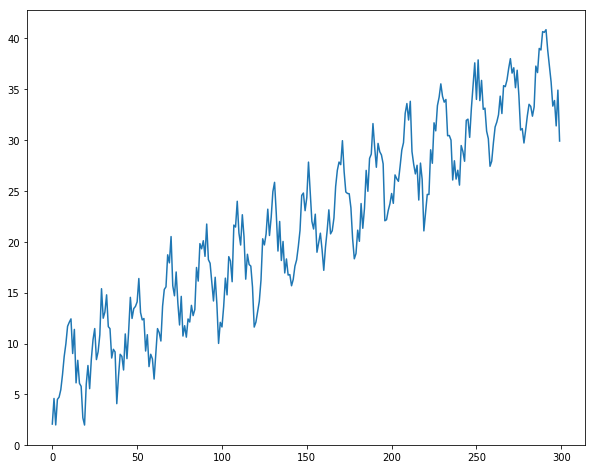

In [5]:
noise = 5.0*np.random.rand(len(train_x_orig))
data_x_orig = train_x_orig + noise

# print(train_x_orig)
# print ("train_x_orig's shape: " + str(train_x_orig.shape))

plt.plot(data_x_orig)
plt.show()

In [6]:
w = np.array([list(data_x_orig[0:0+lenth])])
for i in range(step, len(data_x_orig)-lenth, step):
    w2 = np.array([list(data_x_orig[i:i+lenth])])
    w = np.concatenate((w,w2),axis=0)
# print(w)
# print ("w's shape: " + str(w.shape))

In [7]:
# w_new = np.array([list(w[0])])
# for i in range(1,195):
#     w2 = np.array([list(w[i])])
#     w2 = w2/w2[0][2]
#     w_new = np.concatenate((w_new,w2),axis=0)
# print ("w_new's shape: " + str(w_new.shape))
# print(w_new)

In [8]:
# w = w_new

In [9]:
train_x = w[0:len(w)*3//4]
test_x = w[len(w)*3//4:len(w)]

train_x = train_x.T
test_x = test_x.T

# Standardize data to have feature values between 0 and 1.
# train_x = train_x/train_x.max()
# test_x = test_x/test_x.max()

train_y = np.array([c[0:len(c)*3//4]])
test_y = np.array([c[len(c)*3//4:len(c)]])

print ("train_x's shape: " + str(train_x.shape))
print ("train_y's shape: " + str(train_y.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("test_y's shape: " + str(test_y.shape))

train_x's shape: (10, 217)
train_y's shape: (1, 217)
test_x's shape: (10, 73)
test_y's shape: (1, 73)


In [10]:
### CONSTANTS ###
layers_dims = [lenth, 10, 7, 5, 1] #  5-layer model

In [11]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters =  update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 2.153018
Cost after iteration 100: 0.301606
Cost after iteration 200: 0.241973
Cost after iteration 300: 0.215950
Cost after iteration 400: 0.196528
Cost after iteration 500: 0.186957
Cost after iteration 600: 0.178440
Cost after iteration 700: 0.173747
Cost after iteration 800: 0.169021
Cost after iteration 900: 0.165178
Cost after iteration 1000: 0.162884
Cost after iteration 1100: 0.160948
Cost after iteration 1200: 0.159327
Cost after iteration 1300: 0.157579
Cost after iteration 1400: 0.156998
Cost after iteration 1500: 0.155714
Cost after iteration 1600: 0.155829
Cost after iteration 1700: 0.152253
Cost after iteration 1800: 0.151048
Cost after iteration 1900: 0.149438
Cost after iteration 2000: 0.146299
Cost after iteration 2100: 0.168168
Cost after iteration 2200: 0.141873
Cost after iteration 2300: 0.153307
Cost after iteration 2400: 0.136881
Cost after iteration 2500: 0.137211
Cost after iteration 2600: 0.140859
Cost after iteration 2700: 0.141767
Cost

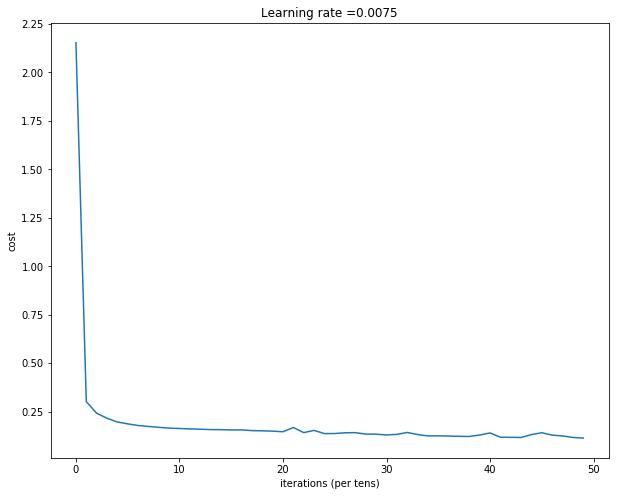

In [12]:
parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0075, num_iterations = 5000, print_cost = True)

In [13]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.926267281106


In [14]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.945205479452


(8, 40.854419552509441)
(16, 40.854419552509441)
(28, 40.854419552509441)
(37, 40.854419552509441)
(48, 40.854419552509441)
(49, 40.854419552509441)
(68, 40.854419552509441)


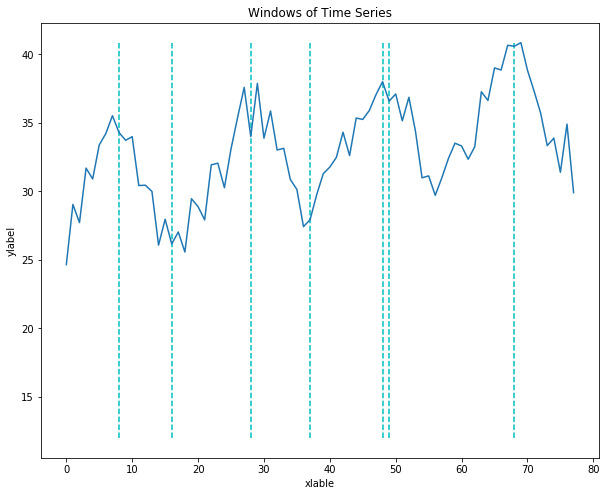

In [15]:
plot_data = data_x_orig[step*len(w)*3//4+5:step*len(w)*3//4+141]
plt.plot(plot_data)
p = predictions_test[:,0:140]

s = 0
for i in p[0]:
    if i == 1.0:
        x = s*step
        print((x, w.max()))
        plt.vlines(x, 12, w.max(), colors = "c", linestyles = "dashed")
    s += 1
plt.ylabel('ylabel')
plt.xlabel('xlable')
plt.title("Windows of Time Series")
plt.show()

In [16]:
import tushare as ts  
e = ts.get_hist_data('000001',start='2014-06-23',end='2017-06-26') 
data_x_orig = e['open']

step = 1
lenth = 10
w = np.array([list(data_x_orig[0:0+lenth])])
for i in range(step, len(data_x_orig)-lenth, step):
    w2 = np.array([list(data_x_orig[i:i+lenth])])
    w = np.concatenate((w,w2),axis=0)
print(w)
print ("w's shape: " + str(w.shape))

[[  9.26   9.23   9.15 ...,   9.08   9.12   9.11]
 [  9.23   9.15   9.17 ...,   9.12   9.11   9.15]
 [  9.15   9.17   9.12 ...,   9.11   9.15   9.15]
 ..., 
 [ 13.82  13.87  14.35 ...,  13.83  14.01  15.4 ]
 [ 13.87  14.35  14.36 ...,  14.01  15.4   14.85]
 [ 14.35  14.36  14.36 ...,  15.4   14.85  14.78]]
w's shape: (589, 10)


In [19]:
train_y_orig = []
for x in w:
    flag = 0
    if x[5]>=x[4] and x[5]>=x[3] and x[5]>=x[6] and x[5]>=x[7]: 
        flag = 1
    if x[5]<=x[4] and x[5]<=x[3] and x[5]<=x[6] and x[5]<=x[7]: 
        flag = 1
    train_y_orig = np.append(train_y_orig, flag)
print ("train_y_orig's shape: " + str(train_y_orig.shape))
c = train_y_orig.copy()
print ("c's shape: " + str(c.shape))

test_x = w.T
test_y = np.array([c[0:len(c)]])

print ("test_x's shape: " + str(test_x.shape))
print ("test_y's shape: " + str(test_y.shape))

train_y_orig's shape: (589,)
c's shape: (589,)
test_x's shape: (10, 589)
test_y's shape: (1, 589)


In [20]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.692699490662


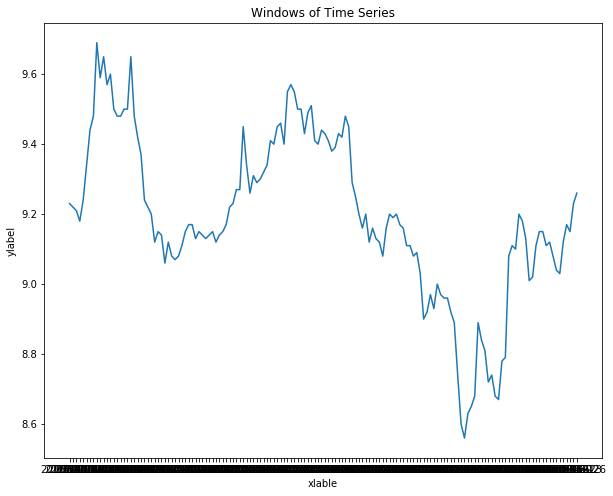

In [21]:
plot_data = data_x_orig[0:150]
plt.plot(plot_data)
p = predictions_test[:,0:140]

s = 0
for i in p[0]:
    if i == 1.0:
        x = s*step
        print((x, w.max()))
        plt.vlines(x, 12, w.max(), colors = "c", linestyles = "dashed")
    s += 1
plt.ylabel('ylabel')
plt.xlabel('xlable')
plt.title("Windows of Time Series")
plt.show()

In [22]:
print(p)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
